# Limits of k-Means

In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import numpy as np

In [2]:
# Some data preperation on Target-Dataset
features = open("../data/Target.lrn", "r")
labels = open("../data/Target.cls", "r")

X_target=[]
for x in features:
  X_target.append(x.split("\t"))

Y_target=[]
for y in labels:
  Y_target.append(y.split("\t"))

X_target = np.array(X_target[4:]).astype(np.float)
Y_target = np.array(Y_target[1:]).astype(np.float)

print(X_target[:2])
print(Y_target[:2])

[[ 1. -3. -3.]
 [ 2. -3.  3.]]
[[1. 5.]
 [2. 4.]]


In [3]:
# Remove the first rows
X_target = np.delete(X_target, 0, 1)
Y_target = np.delete(Y_target, 0, 1)

print("X:",X_target.shape)
print("Y:",Y_target.shape)

X: (770, 2)
Y: (770, 1)


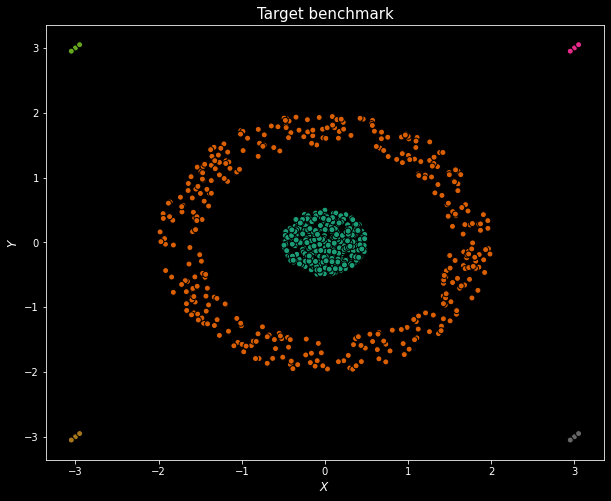

In [28]:
import matplotlib.cm as cm

plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
plt.scatter(X_target[:, 0], X_target[:, 1], 
            c=Y_target, edgecolor="black",
            cmap=cm.Dark2)
plt.ylabel("$Y$", size=12)
plt.xlabel("$X$", size=12)
plt.title("Target benchmark", size=15)
plt.show()

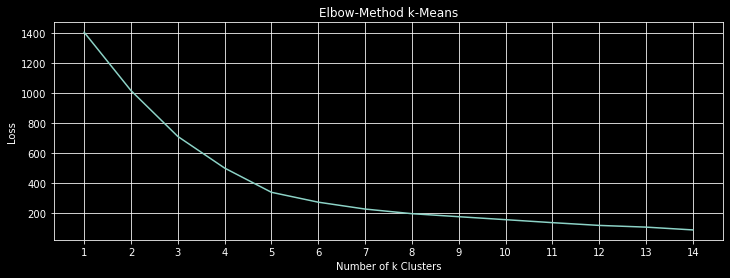

In [182]:
# Elbow method
loss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_target)
    loss.append(kmeans.inertia_)
    

plt.figure(figsize=(12, 4))
plt.plot(range(1, 15), loss)
plt.xticks(range(1, 15))
plt.xlabel("Number of k Clusters")
plt.title("Elbow-Method k-Means")
plt.ylabel("Loss")
plt.grid()
#plt.savefig("elbow-tetra.pdf", dpi = 300, bbox_inches="tight")
plt.show()

In [167]:
# Own init method 
my_init = np.array([
    [5, 5],
    [-5, -5],
    [5, -5],
    [-5, 5],
    [0, 0],
    [1, 0],
    [-1, 0],
    [0, 1]
])

In [168]:
kmeans_5 = KMeans(n_clusters=5).fit(X_target)
my_kmeans = KMeans(n_clusters=8, init=my_init).fit(X_target)

In [169]:
centroids_5 = kmeans_5.cluster_centers_
Y_kmean_5 = kmeans_5.labels_
Y_kmean_5 += 1

print(centroids_5)
centroids_14 = kmeans_14.cluster_centers_
Y_kmean_14 = kmeans_14.labels_
Y_kmean_14 += 1

[[ 1.32634626 -1.01080009]
 [-1.24006227  1.15081667]
 [-1.08116062 -1.30840123]
 [ 0.00909089 -0.02326302]
 [ 1.1258747   1.25385075]]


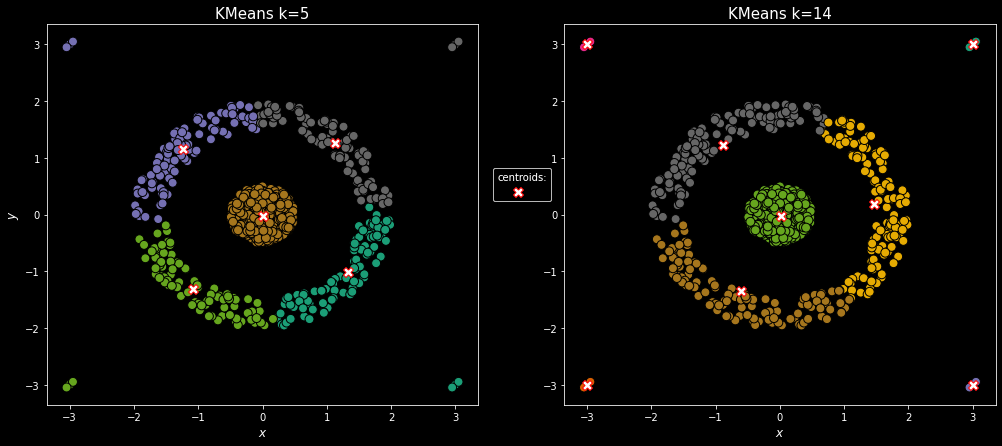

In [179]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(17, 7))

#################################################################################################################
#### First plot ####
ax = fig.add_subplot(1, 2, 1)

# Datapoints plot
scatter1 = ax.scatter(X_target[:, 0], X_target[:, 1], c=Y_kmean_5,
                     edgecolor="k", cmap=cm.Dark2, s=80)

# Centroids plot
scatter2 = ax.scatter(centroids_5[:,0], centroids_5[:,1], c="white",
                      marker="X", s=100, edgecolor="r")

# Centroid legend
legend2 = ax.legend(["_",""], loc="right",
                    title="centroids:",
                    bbox_to_anchor=[1.18, 0.58])
ax.add_artist(legend2)

ax.set_xlabel("$x$", size=12)
ax.set_ylabel("$y$", size=12)
ax.set_title("KMeans k=5", size=15)

#################################################################################################################
#### Second Plot ####
ax = fig.add_subplot(1, 2, 2)

# Datapoints plot
scatter1 = ax.scatter(X_target[:, 0], X_target[:, 1], c=Y_kmean_14,
                     edgecolor="k", cmap=cm.Dark2, s=80)

# Centroids plot
scatter2 = ax.scatter(centroids_14[:,0], centroids_14[:,1], c="white",
                      marker="X", s=100, edgecolor="r")

ax.set_xlabel("$x$", size=12)
ax.set_title("KMeans k=14", size=15)
plt.show()